## Data Scientist Job Role in UK

This dataset provides a collection of data scientist job listings from Glassdoor. It includes key details like job titles, company names, locations, estimated salaries, posting dates, and company ratings. This dataset is ideal for analyzing trends in data science roles, salary ranges, and company preferences within the UK's job market in 2024.

This CSV file contains detailed information on data scientist job listings in UK sourced from Glassdoor. The dataset includes the following columns:

   * Company: Name of the hiring company.
   * Company Score: Average rating of the company on Glassdoor.
   * Job Title: Title of the job position.
   * Location: Job location, including city and state.
   * Date: Date the job was posted or updated.
   * Salary: Estimated salary range for the position.
   * Skills:Skills required for the position


In [1]:
import pandas as pd
import warnings

In [2]:
df = pd.read_csv('Raw_Dataset.csv')

In [3]:
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,£35K (Employer est.),"Data mining, Big data, R, Data analysis skills..."
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,£31.00 Per Hour (Employer est.),"R, SQL, JavaScript, Python"
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,£50K - £65K (Employer est.),"SQL, Maths, Data science, Python"
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,£41K - £54K (Glassdoor est.),"Software deployment, Data analysis skills, Sta..."
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,£60K - £90K (Employer est.),"MATLAB, R, Maths, C, Machine learning"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        750 non-null    object 
 1   Company Score  697 non-null    float64
 2   Job Title      750 non-null    object 
 3   Location       750 non-null    object 
 4   Date           750 non-null    object 
 5   Salary         635 non-null    object 
 6   Skills         742 non-null    object 
dtypes: float64(1), object(6)
memory usage: 41.1+ KB


In [5]:
df.describe(include = 'all')

,Company,Company Score,Job Title,Location,Date,Salary,Skills
count,750,697.000000,750,750,750,635,742
unique,454,NaN,563,87,30,447,660
top,JPMorgan Chase & Co,NaN,Data Scientist,"London, England",30d+,£70K - £110K (Glassdoor est.),"Machine learning, Natural language processing,..."
freq,13,NaN,67,445,426,8,9
mean,NaN,3.847633,NaN,NaN,NaN,NaN,NaN
std,NaN,0.461629,NaN,NaN,NaN,NaN,NaN
min,NaN,1.700000,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.600000,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.900000,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.100000,NaN,NaN,NaN,NaN,NaN


### Salary

In [6]:
df['Salary'] = df['Salary'].str.replace('£', '').str.replace('K', '000')

In [7]:
df['Salary'] = df['Salary'].str.replace(r'\(Employer est.\)', '', regex = True)
df['Salary'] = df['Salary'].str.replace(r'\(Glassdoor est.\)', '', regex = True)

In [8]:
import re

In [9]:
def convert_to_yearly(salary):
    if 'Per Hour' in str(salary):
        hourly_rate = re.findall(r'\d+\.?\d*', salary)
        if hourly_rate:
            return float(hourly_rate[0]) * 2080 # Convert to yearly salary
    return salary

In [10]:
df['Salary'] = df['Salary'].apply(convert_to_yearly)

In [11]:
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000,"Data mining, Big data, R, Data analysis skills..."
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,64480.0,"R, SQL, JavaScript, Python"
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000,"SQL, Maths, Data science, Python"
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000,"Software deployment, Data analysis skills, Sta..."
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000,"MATLAB, R, Maths, C, Machine learning"


In [12]:
df['Salary'] = df['Salary'].astype(str)

In [13]:
df[['Salary_min', 'Salary_max']] = df['Salary'].str.split('-', expand = True)

In [14]:
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills,Salary_min,Salary_max
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000,"Data mining, Big data, R, Data analysis skills...",35000,None
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,64480.0,"R, SQL, JavaScript, Python",64480.0,None
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000,"SQL, Maths, Data science, Python",50000,65000
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000,"Software deployment, Data analysis skills, Sta...",41000,54000
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000,"MATLAB, R, Maths, C, Machine learning",60000,90000


In [15]:
# Remove all white spaces
df['Salary_min'] = df['Salary_min'].str.strip()
df['Salary_max'] = df['Salary_max'].str.strip()

In [16]:
# Convert these columns to numeric
df['Salary_min'] = pd.to_numeric(df['Salary_min'], errors = 'coerce')
df['Salary_max'] = pd.to_numeric(df['Salary_max'], errors = 'coerce')

In [17]:
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills,Salary_min,Salary_max
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000,"Data mining, Big data, R, Data analysis skills...",35000.0,NaN
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,64480.0,"R, SQL, JavaScript, Python",64480.0,NaN
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000,"SQL, Maths, Data science, Python",50000.0,65000.0
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000,"Software deployment, Data analysis skills, Sta...",41000.0,54000.0
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000,"MATLAB, R, Maths, C, Machine learning",60000.0,90000.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        750 non-null    object 
 1   Company Score  697 non-null    float64
 2   Job Title      750 non-null    object 
 3   Location       750 non-null    object 
 4   Date           750 non-null    object 
 5   Salary         750 non-null    object 
 6   Skills         742 non-null    object 
 7   Salary_min     628 non-null    float64
 8   Salary_max     574 non-null    float64
dtypes: float64(3), object(6)
memory usage: 52.9+ KB


### Location

In [19]:
df['Location'] = df['Location'].astype(str)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        750 non-null    object 
 1   Company Score  697 non-null    float64
 2   Job Title      750 non-null    object 
 3   Location       750 non-null    object 
 4   Date           750 non-null    object 
 5   Salary         750 non-null    object 
 6   Skills         742 non-null    object 
 7   Salary_min     628 non-null    float64
 8   Salary_max     574 non-null    float64
dtypes: float64(3), object(6)
memory usage: 52.9+ KB


In [21]:
df[['City', 'Country']] = df['Location'].str.split(',', n=1, expand = True)

In [22]:
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills,Salary_min,Salary_max,City,Country
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000,"Data mining, Big data, R, Data analysis skills...",35000.0,NaN,Manchester,England
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,64480.0,"R, SQL, JavaScript, Python",64480.0,NaN,London,England
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000,"SQL, Maths, Data science, Python",50000.0,65000.0,Nottingham,England
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000,"Software deployment, Data analysis skills, Sta...",41000.0,54000.0,Edinburgh,Scotland
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000,"MATLAB, R, Maths, C, Machine learning",60000.0,90000.0,London,England


### Skills

In [23]:
skills_split = df['Skills'].str.get_dummies(sep = ', ')

In [24]:
skills_split

,AI,APIs,ASP.NET,ATS,AWS,Account management,Accounting,Adobe Flash,Agile,Alteryx,...,Unreal Engine,Usability,Visual Studio,Warehouse experience,Waterfall,Web services,WordPress,XML,iOS,iOS development
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
skills_split.columns

Index(['AI', 'APIs', 'ASP.NET', 'ATS', 'AWS', 'Account management',
       'Accounting', 'Adobe Flash', 'Agile', 'Alteryx',
       ...
       'Unreal Engine', 'Usability', 'Visual Studio', 'Warehouse experience',
       'Waterfall', 'Web services', 'WordPress', 'XML', 'iOS',
       'iOS development'],
      dtype='object', length=242)

In [26]:
df_with_skills = pd.concat([df, skills_split], axis = 1)

In [27]:
df_with_skills.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills,Salary_min,Salary_max,City,...,Unreal Engine,Usability,Visual Studio,Warehouse experience,Waterfall,Web services,WordPress,XML,iOS,iOS development
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000,"Data mining, Big data, R, Data analysis skills...",35000.0,NaN,Manchester,...,0,0,0,0,0,0,0,0,0,0
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,64480.0,"R, SQL, JavaScript, Python",64480.0,NaN,London,...,0,0,0,0,0,0,0,0,0,0
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000,"SQL, Maths, Data science, Python",50000.0,65000.0,Nottingham,...,0,0,0,0,0,0,0,0,0,0
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000,"Software deployment, Data analysis skills, Sta...",41000.0,54000.0,Edinburgh,...,0,0,0,0,0,0,0,0,0,0
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000,"MATLAB, R, Maths, C, Machine learning",60000.0,90000.0,London,...,0,0,0,0,0,0,0,0,0,0


In [28]:
skill_frequencies = df_with_skills.iloc[:, df_with_skills.columns.get_loc('AI'):].sum()

In [29]:
skill_frequencies.sort_values(ascending = False)

Machine learning    306
SQL                 180
TensorFlow          167
R                   147
Azure               128
                   ... 
Mac OS                1
Logistics             1
LoadRunner            1
Legal drafting        1
iOS development       1
Length: 242, dtype: int64

## Visualisation

### Top 10 skills

In [30]:
skills_columns = df_with_skills.iloc[:, df_with_skills.columns.get_loc('AI'):].sum().sort_values(ascending = False)

In [31]:
top_10_skills = skills_columns.head(10)

In [32]:
top_10_skills

Machine learning         306
SQL                      180
TensorFlow               167
R                        147
Azure                    128
Data science             103
Python                    94
AWS                       87
Google Cloud Platform     81
Communication skills      81
dtype: int64

In [33]:
import matplotlib.pyplot as plt

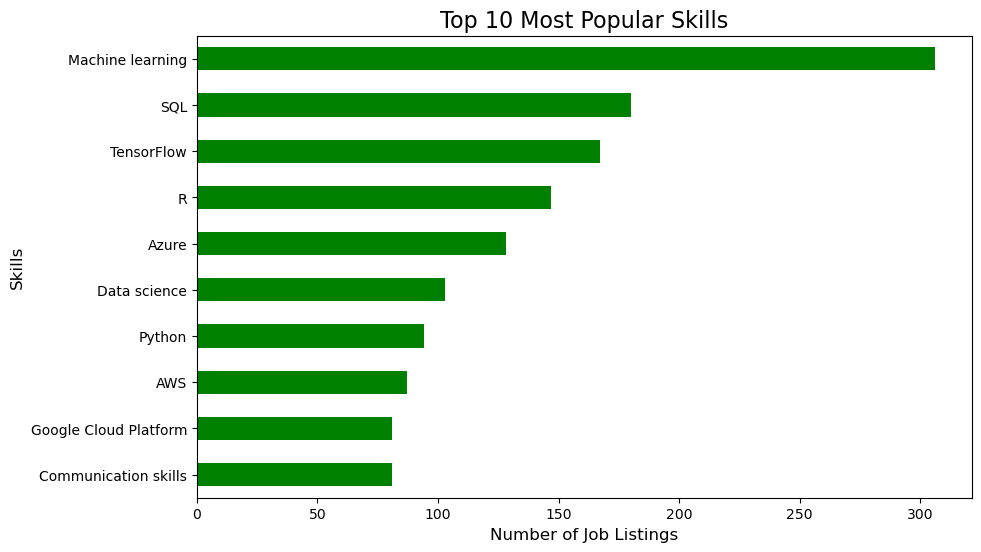

In [34]:
plt.figure(figsize = (10,6))
top_10_skills.plot(kind = 'barh', color = 'green')
plt.title('Top 10 Most Popular Skills', fontsize = 16)
plt.xlabel('Number of Job Listings', fontsize = 12)
plt.ylabel('Skills', fontsize = 12)
plt.gca().invert_yaxis()
plt.show()

## Top 10 skills for specific job

In [35]:
df['Job Title'].value_counts()

Job Title
Data Scientist                                                                       67
Senior Data Scientist                                                                36
Machine Learning Engineer                                                            23
Senior Machine Learning Engineer                                                     11
Lead Data Scientist                                                                  10
                                                                                     ..
Consultant - Analytics & Artificial Intelligence - Data & AI Architect                1
Digital Audit Manager - Data Analytics                                                1
Senior Consultant - Data & AI Strategy - Data Management                              1
Associate, Data Science Analyst – Global Oil Markets (Hybrid - 3/2 Work Schedule)     1
Senior Deep Learning / AI Engineer                                                    1
Name: count, Length: 5

#### Data Analyst

In [36]:
da_jobs = df_with_skills[df_with_skills['Job Title'].str.contains('Data Analyst', case = False, na = False)]
da_skills = da_jobs.iloc[:, da_jobs.columns.get_loc('AI'):].sum().sort_values(ascending = False)

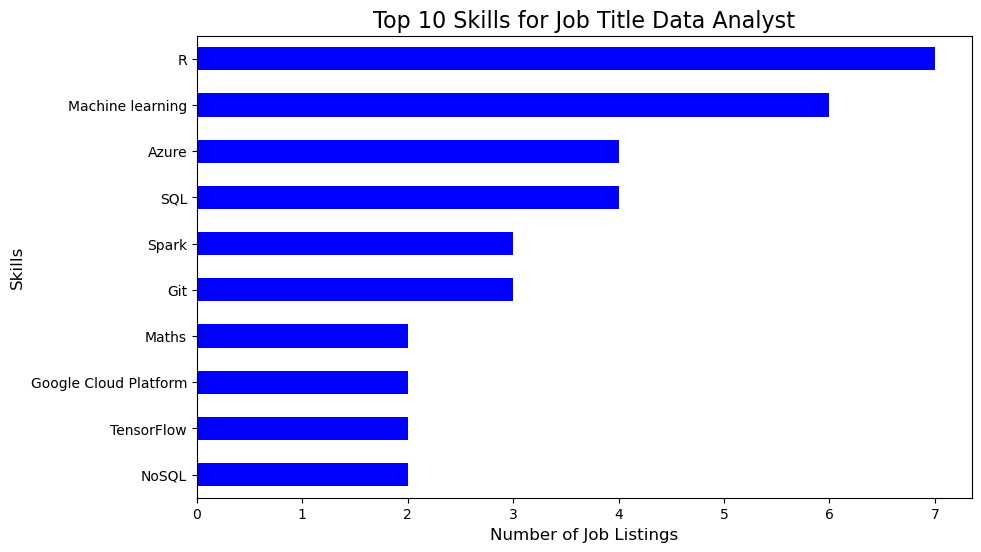

In [37]:
top_10_da_skills = da_skills.head(10)

plt.figure(figsize = (10,6))
top_10_da_skills.plot(kind = 'barh', color = 'blue')
plt.title('Top 10 Skills for Job Title Data Analyst', fontsize = 16)
plt.xlabel('Number of Job Listings', fontsize = 12)
plt.ylabel('Skills', fontsize = 12)
plt.gca().invert_yaxis()
plt.show()

#### Data Scientist

In [38]:
ds_jobs = df_with_skills[df_with_skills['Job Title'].str.contains('Data Scientist', case = False, na = False)]
ds_skills = ds_jobs.iloc[:, ds_jobs.columns.get_loc('AI'):].sum().sort_values(ascending = False)

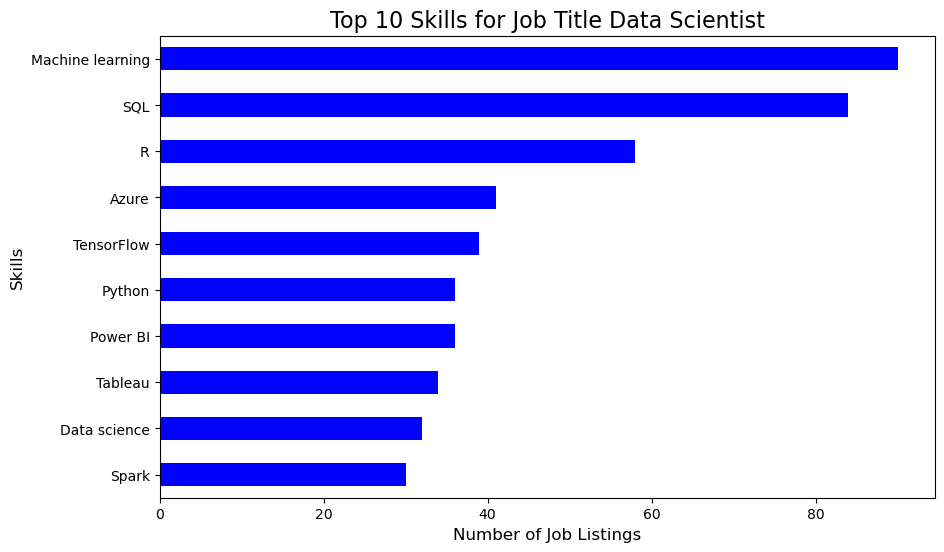

In [39]:
top_10_ds_skills = ds_skills.head(10)

plt.figure(figsize = (10,6))
top_10_ds_skills.plot(kind = 'barh', color = 'blue')
plt.title('Top 10 Skills for Job Title Data Scientist', fontsize = 16)
plt.xlabel('Number of Job Listings', fontsize = 12)
plt.ylabel('Skills', fontsize = 12)
plt.gca().invert_yaxis()
plt.show()

### Salary Distirbutions

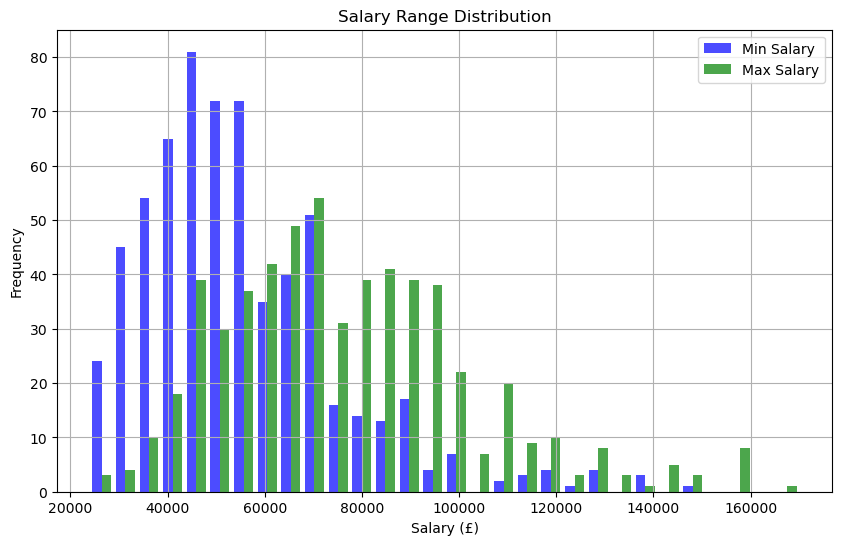

In [40]:
plt.figure(figsize = (10,6))
plt.hist([df['Salary_min'], df['Salary_max']], bins = 30, label = ['Min Salary', 'Max Salary'],
         color  = ['blue', 'green'], alpha = 0.7)
plt.title('Salary Range Distribution')
plt.xlabel('Salary (£)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
df['Job Title'] = df['Job Title'].str.replace('DATA SCIENTIST', 'Data Scientist', case = False)

In [42]:
top_companies = df['Company'].value_counts().head(10)
top_job_titles = df['Job Title'].value_counts().head(10)

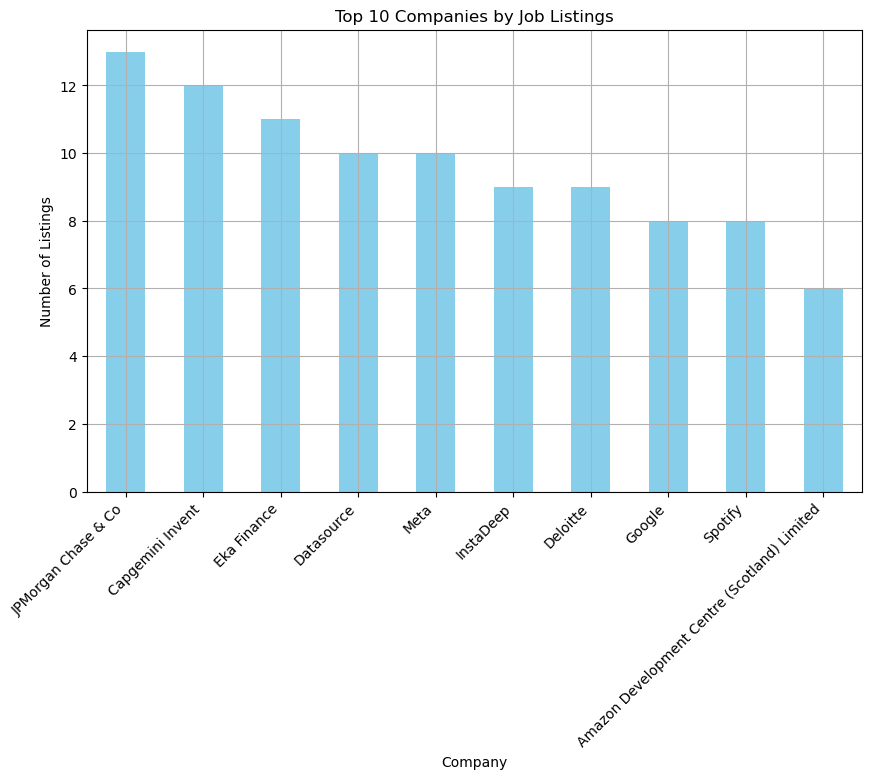

In [43]:
plt.figure(figsize = (10,6))
top_companies.plot(kind = 'bar', color = 'skyblue')
plt.title('Top 10 Companies by Job Listings')
plt.xlabel('Company')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

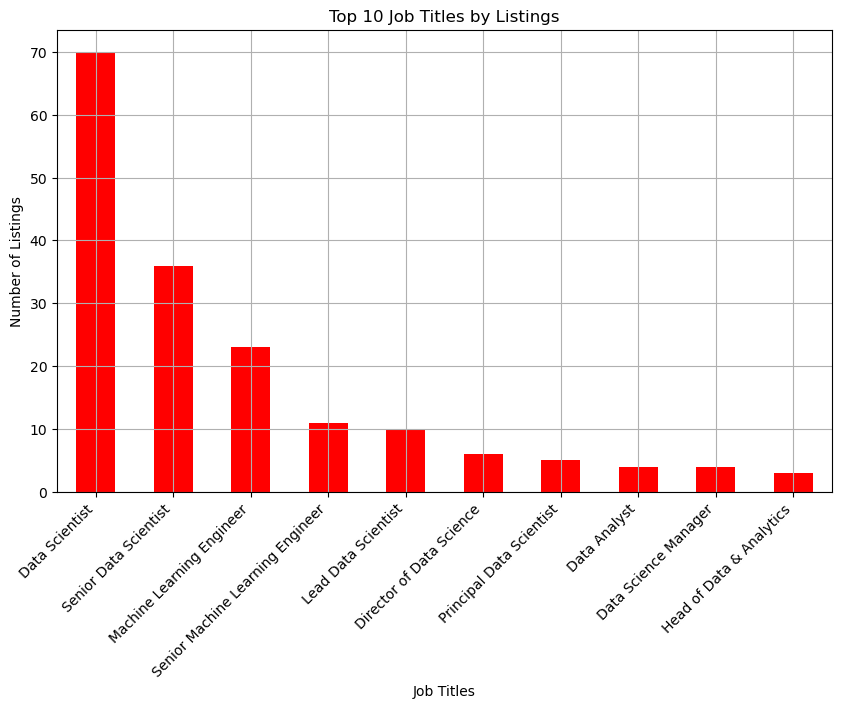

In [44]:
plt.figure(figsize = (10,6))
top_job_titles.plot(kind = 'bar', color = 'red')
plt.title('Top 10 Job Titles by Listings')
plt.xlabel('Job Titles')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.xticks(rotation = 45, ha = 'right')
plt.show()